In [6]:
import pandas as pd

In [7]:
df_ADMISSIONS = pd.read_csv('ADMISSIONS - Copy.csv')

df_DIAGNOSES_ICD = pd.read_csv('DIAGNOSES_ICD.csv')
df_D_ICD_PROCEDURES = pd.read_csv('D_ICD_PROCEDURES.csv')
df_D_LABITEMS = pd.read_csv('D_LABITEMS.csv')
df_PROCEDURES_ICD = pd.read_csv('PROCEDURES_ICD.csv')
df_LABEVENTS = pd.read_csv('LABEVENTS.csv')
df_D_ITEMS=pd.read_csv('D_ITEMS.csv')

In [8]:
# Filter rows where 'long_title' contains the specific string
filtered_df = df_D_ICD_PROCEDURES[df_D_ICD_PROCEDURES['long_title'].str.contains(r'invasive mechanical ventilation', case=False, na=False)]

# Extract the 'icd9_code' column from the filtered rows
icd9_codes = filtered_df['icd9_code']

# Print the extracted 'icd9_code' values
icd9_code_list = icd9_codes.to_list()
df_PROCEDURES_ICD_filtered = df_PROCEDURES_ICD[df_PROCEDURES_ICD['icd9_code'].isin(icd9_code_list)]



In [9]:
# Perform a merge on 'subject_id' with suffixes for overlapping columns
merged_df = df_PROCEDURES_ICD_filtered.merge(df_DIAGNOSES_ICD, on='subject_id', how='left', suffixes=('_PROCEDURES', '_DIAGNOSES'))
merged_df = merged_df.merge(df_ADMISSIONS, on='subject_id', how='left', suffixes=("", '_ADMISSIONS'))

# Print the merged DataFrame

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13347 entries, 0 to 13346
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   row_id_PROCEDURES     13347 non-null  int64 
 1   subject_id            13347 non-null  int64 
 2   hadm_id_PROCEDURES    13347 non-null  int64 
 3   seq_num_PROCEDURES    13347 non-null  int64 
 4   icd9_code_PROCEDURES  13347 non-null  int64 
 5   row_id_DIAGNOSES      13347 non-null  int64 
 6   hadm_id_DIAGNOSES     13347 non-null  int64 
 7   seq_num_DIAGNOSES     13347 non-null  int64 
 8   icd9_code_DIAGNOSES   13347 non-null  object
 9   row_id                13347 non-null  int64 
 10  hadm_id               13347 non-null  int64 
 11  admittime             13347 non-null  object
 12  dischtime             13347 non-null  object
 13  deathtime             474 non-null    object
 14  admission_type        13347 non-null  object
 15  admission_location    13347 non-null

In [10]:
merged_df.drop(columns=['row_id_PROCEDURES','admission_type','admission_location','discharge_location', 'hadm_id_PROCEDURES','insurance', 'seq_num_PROCEDURES', 'row_id_DIAGNOSES', 'hadm_id_DIAGNOSES', 'seq_num_DIAGNOSES', 'row_id', 'language', 'religion', 'edregtime', 'edouttime'],inplace=True)

In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13347 entries, 0 to 13346
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   subject_id            13347 non-null  int64 
 1   icd9_code_PROCEDURES  13347 non-null  int64 
 2   icd9_code_DIAGNOSES   13347 non-null  object
 3   hadm_id               13347 non-null  int64 
 4   admittime             13347 non-null  object
 5   dischtime             13347 non-null  object
 6   deathtime             474 non-null    object
 7   marital_status        13289 non-null  object
 8   ethnicity             13347 non-null  object
 9   diagnosis             13347 non-null  object
 10  hospital_expire_flag  13347 non-null  int64 
 11  has_chartevents_data  13347 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 1.2+ MB


In [12]:
merged_df['hospital_expire_flag'].value_counts(0)

hospital_expire_flag
0    12873
1      474
Name: count, dtype: int64

In [13]:
merged_df

,subject_id,icd9_code_PROCEDURES,icd9_code_DIAGNOSES,hadm_id,admittime,dischtime,deathtime,marital_status,ethnicity,diagnosis,hospital_expire_flag,has_chartevents_data
0,10114,9671,4280,167957,2171-10-30 19:03:00,2171-11-06 14:59:00,NaN,MARRIED,UNKNOWN/NOT SPECIFIED,"PULMONARY EDEMA, MI",0,1
1,10114,9671,4240,167957,2171-10-30 19:03:00,2171-11-06 14:59:00,NaN,MARRIED,UNKNOWN/NOT SPECIFIED,"PULMONARY EDEMA, MI",0,1
2,10114,9671,4111,167957,2171-10-30 19:03:00,2171-11-06 14:59:00,NaN,MARRIED,UNKNOWN/NOT SPECIFIED,"PULMONARY EDEMA, MI",0,1
3,10114,9671,2859,167957,2171-10-30 19:03:00,2171-11-06 14:59:00,NaN,MARRIED,UNKNOWN/NOT SPECIFIED,"PULMONARY EDEMA, MI",0,1
4,10114,9671,4928,167957,2171-10-30 19:03:00,2171-11-06 14:59:00,NaN,MARRIED,UNKNOWN/NOT SPECIFIED,"PULMONARY EDEMA, MI",0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13342,40177,9671,3659,198480,2169-05-06 23:16:00,2169-05-12 08:54:00,2169-05-12 08:54:00,MARRIED,WHITE,ACUTE CHOLANGITIS,1,1
13343,40177,9671,2724,198480,2169-05-06 23:16:00,2169-05-12 08:54:00,2169-05-12 08:54:00,MARRIED,WHITE,ACUTE CHOLANGITIS,1,1
13344,40177,9671,4019,198480,2169-05-06 23:16:00,2169-05-12 08:54:00,2169-05-12 08:54:00,MARRIED,WHITE,ACUTE CHOLANGITIS,1,1
13345,40177,9671,V4581,198480,2169-05-06 23:16:00,2169-05-12 08:54:00,2169-05-12 08:54:00,MARRIED,WHITE,ACUTE CHOLANGITIS,1,1


# **preprocessing for chart and lab event tables-**
---

In [14]:
# Get the unique patient IDs from the filtered merged_df table
merged_df_unique_pts = merged_df['subject_id'].unique()

# Filter the LABEVENTS table for these patient IDs
filtered_labevents_df = df_LABEVENTS[df_LABEVENTS['subject_id'].isin(merged_df_unique_pts)]


In [15]:
# Ensure dates are in datetime format
merged_df['admittime'] = pd.to_datetime(merged_df['admittime'])
merged_df['dischtime'] = pd.to_datetime(merged_df['dischtime'])
filtered_labevents_df['charttime'] = pd.to_datetime(filtered_labevents_df['charttime'])

# Filter the LABEVENTS DataFrame
filtered_labevents_list = []

# Aggregate date ranges by patient and hospital admission
agg_df = merged_df.groupby(['subject_id', 'hadm_id']).agg({'admittime': 'min', 'dischtime': 'max'}).reset_index()

# Iterate over each patient admission in the aggregated DataFrame
for index, row in agg_df.iterrows():
    subject_id = row['subject_id']
    hadm_id = row['hadm_id']
    start_date = row['admittime']
    end_date = row['dischtime']

    # Filter LABEVENTS for the current patient admission and date range
    patient_admission_labevents = filtered_labevents_df[
        (filtered_labevents_df['subject_id'] == subject_id) &
        (filtered_labevents_df['hadm_id'] == hadm_id) &
        (filtered_labevents_df['charttime'] >= start_date) &
        (filtered_labevents_df['charttime'] <= end_date)
    ]

<ipython-input-15-98fe4ec66e3c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_labevents_df['charttime'] = pd.to_datetime(filtered_labevents_df['charttime'])


In [16]:
patient_admission_labevents

,row_id,subject_id,hadm_id,itemid,charttime,value,valuenum,valueuom,flag
71922,20446738,44212,163189.0,50861,2123-11-24 14:40:00,31,31.00,IU/L,NaN
71923,20446739,44212,163189.0,50862,2123-11-24 14:40:00,2.9,2.90,g/dL,abnormal
71924,20446740,44212,163189.0,50863,2123-11-24 14:40:00,42,42.00,IU/L,NaN
71925,20446741,44212,163189.0,50868,2123-11-24 14:40:00,18,18.00,mEq/L,NaN
71926,20446742,44212,163189.0,50878,2123-11-24 14:40:00,127,127.00,IU/L,abnormal
...,...,...,...,...,...,...,...,...,...
75010,20449844,44212,163189.0,51274,2123-12-30 07:20:00,24.1,24.10,sec,abnormal
75011,20449845,44212,163189.0,51275,2123-12-30 07:20:00,56.3,56.30,sec,abnormal
75012,20449846,44212,163189.0,51277,2123-12-30 07:20:00,25.6,25.60,%,abnormal
75013,20449847,44212,163189.0,51279,2123-12-30 07:20:00,2.74,2.74,m/uL,abnormal


preprocessing the cahrts for lab and vital signs , so no missing values will exist.
---
At first, we will check the type of missing value- if it is a "popular" mistake- it might not be a human error but a consistent issue that needs intervention.

for example, normal levels of PH are between 7.35 to 7.45, but it was found that the PH levels are entered so only the decimal value is shown.
this requires a fix so the flag column will result correctly.



In [17]:
#after finding a lot of missing values, we will process our data to contain the right flags by the normal value of each lab result:
null_values_df=patient_admission_labevents[patient_admission_labevents.isna().any(axis=1)]
#exctracting only the "popular" missing flag values that imply on a consisntency issue and not on malfunctions:
count_null_byitem=null_values_df.groupby('itemid').count().sort_values(by='value',ascending=False).reset_index()
count_null_byitem=count_null_byitem[count_null_byitem['value']>30]
count_null_byitem.itemid

0     50800
1     50802
2     50868
3     50983
4     50902
5     50804
6     50971
7     50820
8     50818
9     50960
10    50825
11    50893
12    51006
13    50812
14    50912
15    51237
16    50827
17    50931
18    50816
19    51250
20    50882
21    50819
Name: itemid, dtype: int64


Since the dictionary of labevents do not include normal range of results , we will only check the flags for the missing values and fill them as "normal\abnormal", no partitioning of high\low levels.

In [18]:


# Define the normal ranges for each relevant itemid in the list found to be the popular missing items
normal_ranges = {
     50800: (3.5, 5.0),  # Albumin
     50802: (7, 56),  # ALT
     50868: (75, 100),  # pO2
     50902: (8.5, 10.2),  # Calcium
     50983: (7, 20),  # BUN
     50804: (3.5, 5.0),  # Albumin
     50971: (0.6, 1.2),  # Creatinine
     50820: (0, 0.3),  # Bilirubin (Direct)
     50825: (8.5, 10.2),  # Calcium
     50893: (135, 145),  # Sodium
     51006: (35, 45),  # pH (Arterial)
     50931: (22, 29),  # Bicarbonate
     50827: (0, 200),  # Cholesterol
     50863: (35, 45),  # pH
     50861: (35, 45) # pCO2

}

# Define the function to assign the flag
def assign_flag(row):
    itemid = row['itemid']
    value = row['value']
    flag=row['flag']
    if not pd.isna(flag):
        return flag
    if pd.isna(value) or itemid not in normal_ranges:
        return None
    normal_range = normal_ranges[itemid]
    if value < normal_range[0] or value > normal_range[1]:
        return 'abnormal'
    else:
        return 'normal'

# Convert 'value' column to numeric, coercing errors to NaN
patient_admission_labevents['value'] = pd.to_numeric(patient_admission_labevents['value'], errors='coerce')

# Apply the function to the DataFrame
patient_admission_labevents['flag'] = patient_admission_labevents.apply(assign_flag, axis=1)

# Display the DataFrame with the new 'flag' column
patient_admission_labevents = patient_admission_labevents.dropna(subset=['flag', 'value'])

patient_admission_labevents

<ipython-input-18-e2929a150890>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_admission_labevents['value'] = pd.to_numeric(patient_admission_labevents['value'], errors='coerce')
<ipython-input-18-e2929a150890>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_admission_labevents['flag'] = patient_admission_labevents.apply(assign_flag, axis=1)


,row_id,subject_id,hadm_id,itemid,charttime,value,valuenum,valueuom,flag
71922,20446738,44212,163189.0,50861,2123-11-24 14:40:00,31.00,31.00,IU/L,abnormal
71923,20446739,44212,163189.0,50862,2123-11-24 14:40:00,2.90,2.90,g/dL,abnormal
71924,20446740,44212,163189.0,50863,2123-11-24 14:40:00,42.00,42.00,IU/L,normal
71925,20446741,44212,163189.0,50868,2123-11-24 14:40:00,18.00,18.00,mEq/L,abnormal
71926,20446742,44212,163189.0,50878,2123-11-24 14:40:00,127.00,127.00,IU/L,abnormal
...,...,...,...,...,...,...,...,...,...
75010,20449844,44212,163189.0,51274,2123-12-30 07:20:00,24.10,24.10,sec,abnormal
75011,20449845,44212,163189.0,51275,2123-12-30 07:20:00,56.30,56.30,sec,abnormal
75012,20449846,44212,163189.0,51277,2123-12-30 07:20:00,25.60,25.60,%,abnormal
75013,20449847,44212,163189.0,51279,2123-12-30 07:20:00,2.74,2.74,m/uL,abnormal


Now we will create a DF that contains a list of labevents for each pt that has the releveant icd9 code
---

#run only once!!!#

In [19]:
for index, row in agg_df.iterrows():
    subject_id = row['subject_id']
    hadm_id = row['hadm_id']
    start_date = row['admittime']
    end_date = row['dischtime']

    # Select only the necessary columns
    patient_admission_labevents = patient_admission_labevents[['itemid','value', 'flag']]

    # Append the filtered results to the list
    filtered_labevents_list.append({
        'subject_id': subject_id,
        'hadm_id': hadm_id,
        'admittime': start_date,
        'dischtime': end_date,
        'lab_results': patient_admission_labevents.to_dict(orient='records')
    })

# Convert the list of dictionaries to a DataFrame
filtered_labevents_DF = pd.DataFrame(filtered_labevents_list)
filtered_labevents_DF

,subject_id,hadm_id,admittime,dischtime,lab_results
0,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,"[{'itemid': 50861, 'value': 31.0, 'flag': 'abn..."
1,10040,157839,2147-02-23 11:43:00,2147-02-27 16:19:00,"[{'itemid': 50861, 'value': 31.0, 'flag': 'abn..."
2,10043,168674,2185-04-14 00:23:00,2185-04-26 18:20:00,"[{'itemid': 50861, 'value': 31.0, 'flag': 'abn..."
3,10059,122098,2150-08-22 17:33:00,2150-08-29 18:20:00,"[{'itemid': 50861, 'value': 31.0, 'flag': 'abn..."
4,10059,142582,2150-08-07 21:40:00,2150-08-13 11:33:00,"[{'itemid': 50861, 'value': 31.0, 'flag': 'abn..."
5,10061,145203,2107-01-16 11:33:00,2107-02-10 11:30:00,"[{'itemid': 50861, 'value': 31.0, 'flag': 'abn..."
6,10067,160442,2130-10-06 01:34:00,2130-10-06 02:29:00,"[{'itemid': 50861, 'value': 31.0, 'flag': 'abn..."
7,10069,146672,2188-02-08 11:15:00,2188-02-27 18:41:00,"[{'itemid': 50861, 'value': 31.0, 'flag': 'abn..."
8,10076,198503,2107-03-21 21:16:00,2107-03-30 12:00:00,"[{'itemid': 50861, 'value': 31.0, 'flag': 'abn..."
9,10088,149044,2107-05-12 18:00:00,2107-05-18 13:30:00,"[{'itemid': 50861, 'value': 31.0, 'flag': 'abn..."


In [20]:
# Extract all flags from lab_results and count them- delta means a massive change from the prior lab result taken.
flags = [result['flag'] for results in filtered_labevents_DF['lab_results'] for result in results]
flag_counts = pd.Series(flags).value_counts()
flag_counts

abnormal    126498
delta          232
normal         116
Name: count, dtype: int64


Now we do the same for the vital signs codes. as per the MIMIC III documentation, common vitals are listed below.
---


In [21]:
df_CHARTEVENTS = pd.read_csv('CHARTEVENTS.csv')

In [22]:
# Define a list of itemids for common vital signs
vital_signs_itemids = {
    'Heart Rate': [211, 220045],
    'SysBP': [51, 442, 455, 6701, 220179, 220050],
    'DiasBP': [8368, 8440, 8441, 8553, 220180, 220051],
    'MeanBP': [52, 456, 6702, 443, 220052, 220181],
    'Respiratory Rate': [618, 615, 220210, 224690],
    'Temperature': [223761, 678, 223762, 676],
    'SpO2': [646, 220277],
}

# Filter CHARTEVENTS to include only vital signs itemids
vital_signs_itemids_flat = [item for sublist in vital_signs_itemids.values() for item in sublist]
vital_signs_df = df_CHARTEVENTS[df_CHARTEVENTS['itemid'].isin(vital_signs_itemids_flat)]


In [23]:
# Filter the CHARTEVENTS DataFrame
filtered_chartevents_list = []
vital_signs_df['charttime']=pd.to_datetime(vital_signs_df['charttime'])
# Iterate over each patient admission in the aggregated DataFrame
for index, row in agg_df.iterrows():
    subject_id = row['subject_id']
    hadm_id = row['hadm_id']
    start_date = row['admittime']
    end_date = row['dischtime']

    # Filter CHARTEVENTS for the current patient admission and date range
    patient_admission_chartevents = vital_signs_df[
        (vital_signs_df['subject_id'] == subject_id) &
        (vital_signs_df['hadm_id'] == hadm_id) &
        (vital_signs_df['charttime'] >= start_date) &
        (vital_signs_df['charttime'] <= end_date)
    ]

    # Select only the necessary columns
    patient_admission_chartevents = patient_admission_chartevents[['itemid', 'value']]

    # Append the filtered results to the list
    filtered_chartevents_list.append({
        'subject_id': subject_id,
        'hadm_id': hadm_id,
        'startdate': start_date,
        'enddate': end_date,
        'vital_signs': patient_admission_chartevents.to_dict(orient='records')
    })

# Convert the list of dictionaries to a DataFrame
filtered_chartevents_df = pd.DataFrame(filtered_chartevents_list)

<ipython-input-23-e8c7fde33f4d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vital_signs_df['charttime']=pd.to_datetime(vital_signs_df['charttime'])


In [24]:
# Display the result were we do not have any releveant vital signs:
filtered_chartevents_df[filtered_chartevents_df['vital_signs'].apply(lambda x: len(x) == 0)]

,subject_id,hadm_id,startdate,enddate,vital_signs
0,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,[]
1,10040,157839,2147-02-23 11:43:00,2147-02-27 16:19:00,[]
2,10043,168674,2185-04-14 00:23:00,2185-04-26 18:20:00,[]
3,10059,122098,2150-08-22 17:33:00,2150-08-29 18:20:00,[]
4,10059,142582,2150-08-07 21:40:00,2150-08-13 11:33:00,[]
5,10061,145203,2107-01-16 11:33:00,2107-02-10 11:30:00,[]
6,10067,160442,2130-10-06 01:34:00,2130-10-06 02:29:00,[]
7,10069,146672,2188-02-08 11:15:00,2188-02-27 18:41:00,[]
8,10076,198503,2107-03-21 21:16:00,2107-03-30 12:00:00,[]
9,10088,149044,2107-05-12 18:00:00,2107-05-18 13:30:00,[]


merge all to one df

In [25]:

# Define aggregation functions
agg_functions = {
    'icd9_code_DIAGNOSES': lambda x: list(x),
    'admittime': 'min',
    'dischtime': 'max',
    'deathtime': 'first',
    'ethnicity': 'first',
    'diagnosis': lambda x: list(set(x)),
    'has_chartevents_data':'first'
}

# Aggregate the main merged DataFrame
aggregated_df = merged_df.groupby(['subject_id', 'hadm_id']).agg(agg_functions).reset_index()

# Display the aggregated DataFrame
aggregated_df

,subject_id,hadm_id,icd9_code_DIAGNOSES,admittime,dischtime,deathtime,ethnicity,diagnosis,has_chartevents_data
0,10019,177759,"[0389, 51881, 5770, 30390, 5781, 5845, 2848, 5...",2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,WHITE,[ALCOHOLIC HEPATITIS],1
1,10040,157839,"[40291, 7907, 4928, 51881, 4241, 4280, 41401, ...",2147-02-23 11:43:00,2147-02-27 16:19:00,None,UNKNOWN/NOT SPECIFIED,[PULMONARY EDEMA\CATH],1
2,10043,168674,"[51881, 486, 49121, 00845, 2875, 42831, 4280, ...",2185-04-14 00:23:00,2185-04-26 18:20:00,None,WHITE,[RESPIRATORY DISTRESS],1
3,10059,122098,"[5715, 452, 07070, 2800, 45620, 0389, 99592, 7...",2150-08-22 17:33:00,2150-08-29 18:20:00,2150-08-29 18:20:00,WHITE,[LOWER GI BLEED],1
4,10059,142582,"[5715, 452, 07070, 2800, 45620, 0389, 99592, 7...",2150-08-07 21:40:00,2150-08-13 11:33:00,None,WHITE,[VARICEAL BLEED],1
5,10061,145203,"[4280, 41071, 0389, 78551, 78559, 51881, 5849,...",2107-01-16 11:33:00,2107-02-10 11:30:00,None,WHITE,[CHEST PAIN/ CATH],1
6,10067,160442,"[86404, 8504, 9584, 4275, 2851, E8232, 86389, ...",2130-10-06 01:34:00,2130-10-06 02:29:00,2130-10-06 02:29:00,OTHER,[S/P MOTORCYCLE ACCIDENT],1
7,10069,146672,"[34591, 51881, 78001, 2762, 5070, 4538, 319, 4...",2188-02-08 11:15:00,2188-02-27 18:41:00,2188-02-27 18:41:00,UNKNOWN/NOT SPECIFIED,[SEIZURE],1
8,10076,198503,"[486, 1985, 1972, 5849, 1625, 1970, 2762, 0389...",2107-03-21 21:16:00,2107-03-30 12:00:00,2107-03-30 12:00:00,ASIAN,[LUNG CANCER;SHORTNESS OF BREATH],1
9,10088,149044,"[0389, 99591, 78552, 5990, 4280, V090, 3320, 2...",2107-05-12 18:00:00,2107-05-18 13:30:00,None,WHITE,[UROSEPSIS],1


In [26]:
# Merge filtered_chartevents_df with merged_df using both 'subject_id' and 'hadm_id'
merged = pd.merge(aggregated_df, filtered_chartevents_df, on=['subject_id', 'hadm_id'], how='left', suffixes=('', '_chart'))

# Merge filtered_labevents_df with merged_df using both 'subject_id' and 'hadm_id'
merged = pd.merge(merged, filtered_labevents_DF, on=['subject_id', 'hadm_id'], how='left', suffixes=('', '_lab'))

# Display the merged DataFrame
merged.tail(4)


,subject_id,hadm_id,icd9_code_DIAGNOSES,admittime,dischtime,deathtime,ethnicity,diagnosis,has_chartevents_data,startdate,enddate,vital_signs,admittime_lab,dischtime_lab,lab_results
54,43798,130870,"[1510, 9971, 9974, 51881, 51189, 42731, 2875, ...",2198-06-29 07:15:00,2198-08-07 23:59:00,None,WHITE,[ESOPHAGEAL CA/SDA],1,2198-06-29 07:15:00,2198-08-07 23:59:00,"[{'itemid': 223761, 'value': 95.2}, {'itemid':...",2198-06-29 07:15:00,2198-08-07 23:59:00,"[{'itemid': 50861, 'value': 31.0, 'flag': 'abn..."
55,43909,167612,"[486, 1983, 1628, 2536, 496, 42731, 311, 4589,...",2152-10-09 19:05:00,2152-10-09 22:33:00,2152-10-09 22:33:00,WHITE,[PNEUMONIA;TELEMETRY],1,2152-10-09 19:05:00,2152-10-09 22:33:00,"[{'itemid': 224690, 'value': 20.0}, {'itemid':...",2152-10-09 19:05:00,2152-10-09 22:33:00,"[{'itemid': 50861, 'value': 31.0, 'flag': 'abn..."
56,44154,174245,"[0389, 5185, 5070, 99592, 42731, 72400, 36250,...",2178-05-14 20:29:00,2178-05-15 09:45:00,2178-05-15 09:45:00,WHITE,[ALTERED MENTAL STATUS],1,2178-05-14 20:29:00,2178-05-15 09:45:00,"[{'itemid': 220045, 'value': 75.0}, {'itemid':...",2178-05-14 20:29:00,2178-05-15 09:45:00,"[{'itemid': 50861, 'value': 31.0, 'flag': 'abn..."
57,44212,163189,"[03811, 78552, 5845, 48241, 51881, 5990, 3481,...",2123-11-24 14:14:00,2123-12-30 14:31:00,None,BLACK/AFRICAN AMERICAN,[ACUTE RESPIRATORY DISTRESS SYNDROME;ACUTE REN...,1,2123-11-24 14:14:00,2123-12-30 14:31:00,"[{'itemid': 220045, 'value': 100.0}, {'itemid'...",2123-11-24 14:14:00,2123-12-30 14:31:00,"[{'itemid': 50861, 'value': 31.0, 'flag': 'abn..."


In [27]:
# Select only the relevant columns from patients_df
df_PATIENTS = pd.read_csv('/content/PATIENTS.csv')
df_PATIENTS = df_PATIENTS[['subject_id', 'gender','dob', 'dod_hosp']]

# Merge patients_df with merged DataFrame on 'subject_id', keeping only relevant patients
merged = pd.merge(merged, df_PATIENTS, on='subject_id', how='left')

In [28]:
#age of pt:
from dateutil.relativedelta import relativedelta
merged['dob'] = pd.to_datetime(merged['dob'])
# Calculate age using a lambda function with relativedelta
merged['age'] = merged.apply(lambda row: relativedelta(row['dischtime'], row['dob']).years
                             if pd.notna(row['dob']) and pd.notna(row['dischtime']) else None, axis=1)

In [29]:
#adding a flag to know if pt is dod_hosp
merged['dod_hosp'] = pd.to_datetime(merged['dod_hosp'], errors='coerce')
#change the dod_hosp to dead in hosp or not (1 or 0)
def update_dod_hosp(row):
    admittime = row['admittime']
    dischtime = row['dischtime']
    dod_hosp = row['dod_hosp']

    # Check if dod_hosp is within the admittime and dischtime range
    if pd.notna(dod_hosp) and admittime <= dod_hosp <= dischtime:
        return 1
    else:
        return 0
# Apply the function to update dod_hosp values
merged['dod_hosp'] = merged.apply(update_dod_hosp, axis=1)

In [30]:
merged.head()

,subject_id,hadm_id,icd9_code_DIAGNOSES,admittime,dischtime,deathtime,ethnicity,diagnosis,has_chartevents_data,startdate,enddate,vital_signs,admittime_lab,dischtime_lab,lab_results,gender,dob,dod_hosp,age
0,10019,177759,"[0389, 51881, 5770, 30390, 5781, 5845, 2848, 5...",2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,WHITE,[ALCOHOLIC HEPATITIS],1,2163-05-14 20:43:00,2163-05-15 12:00:00,[],2163-05-14 20:43:00,2163-05-15 12:00:00,"[{'itemid': 50861, 'value': 31.0, 'flag': 'abn...",M,2114-06-20,1,48
1,10040,157839,"[40291, 7907, 4928, 51881, 4241, 4280, 41401, ...",2147-02-23 11:43:00,2147-02-27 16:19:00,None,UNKNOWN/NOT SPECIFIED,[PULMONARY EDEMA\CATH],1,2147-02-23 11:43:00,2147-02-27 16:19:00,[],2147-02-23 11:43:00,2147-02-27 16:19:00,"[{'itemid': 50861, 'value': 31.0, 'flag': 'abn...",F,2061-10-23,0,85
2,10043,168674,"[51881, 486, 49121, 00845, 2875, 42831, 4280, ...",2185-04-14 00:23:00,2185-04-26 18:20:00,None,WHITE,[RESPIRATORY DISTRESS],1,2185-04-14 00:23:00,2185-04-26 18:20:00,[],2185-04-14 00:23:00,2185-04-26 18:20:00,"[{'itemid': 50861, 'value': 31.0, 'flag': 'abn...",M,2109-04-07,0,76
3,10059,122098,"[5715, 452, 07070, 2800, 45620, 0389, 99592, 7...",2150-08-22 17:33:00,2150-08-29 18:20:00,2150-08-29 18:20:00,WHITE,[LOWER GI BLEED],1,2150-08-22 17:33:00,2150-08-29 18:20:00,[],2150-08-22 17:33:00,2150-08-29 18:20:00,"[{'itemid': 50861, 'value': 31.0, 'flag': 'abn...",M,2081-01-03,1,69
4,10059,142582,"[5715, 452, 07070, 2800, 45620, 0389, 99592, 7...",2150-08-07 21:40:00,2150-08-13 11:33:00,None,WHITE,[VARICEAL BLEED],1,2150-08-07 21:40:00,2150-08-13 11:33:00,[],2150-08-07 21:40:00,2150-08-13 11:33:00,"[{'itemid': 50861, 'value': 31.0, 'flag': 'abn...",M,2081-01-03,0,69


In [31]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   subject_id            58 non-null     int64         
 1   hadm_id               58 non-null     int64         
 2   icd9_code_DIAGNOSES   58 non-null     object        
 3   admittime             58 non-null     datetime64[ns]
 4   dischtime             58 non-null     datetime64[ns]
 5   deathtime             21 non-null     object        
 6   ethnicity             58 non-null     object        
 7   diagnosis             58 non-null     object        
 8   has_chartevents_data  58 non-null     int64         
 9   startdate             58 non-null     datetime64[ns]
 10  enddate               58 non-null     datetime64[ns]
 11  vital_signs           58 non-null     object        
 12  admittime_lab         58 non-null     datetime64[ns]
 13  dischtime_lab         

In [32]:
#export the data to CSV format

merged.to_csv('merged_final.csv', index=False)

# **EDA**

Continuing working on the original CSVs-*italicized text*

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [34]:

#taking only releveant columns

eda_df = merged[['subject_id','hadm_id','admittime','dischtime','age','gender','ethnicity',
                 'icd9_code_DIAGNOSES','diagnosis','startdate','enddate','vital_signs','admittime_lab','dischtime_lab','lab_results','dod_hosp']].copy()
eda_df.rename(columns={'dod_hosp': 'hospital_expire_flag'}, inplace=True)
eda_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   subject_id            58 non-null     int64 
 1   hadm_id               58 non-null     int64 
 2   admittime             58 non-null     object
 3   dischtime             58 non-null     object
 4   age                   58 non-null     int64 
 5   gender                58 non-null     object
 6   ethnicity             58 non-null     object
 7   icd9_code_DIAGNOSES   58 non-null     object
 8   diagnosis             58 non-null     object
 9   startdate             58 non-null     object
 10  enddate               58 non-null     object
 11  vital_signs           58 non-null     object
 12  admittime_lab         58 non-null     object
 13  dischtime_lab         58 non-null     object
 14  lab_results           58 non-null     object
 15  hospital_expire_flag  58 non-null     int6

#Starting with Demographic and Primary Diagnostic information
---

# Demographic EDA

In [35]:
Demographers_data = eda_df[['subject_id','hadm_id','age', 'gender', 'ethnicity', 'hospital_expire_flag']]
Demographers_data.head()

,subject_id,hadm_id,age,gender,ethnicity,hospital_expire_flag
0,10019,177759,48,M,WHITE,1
1,10040,157839,85,F,UNKNOWN/NOT SPECIFIED,0
2,10043,168674,76,M,WHITE,0
3,10059,122098,69,M,WHITE,1
4,10059,142582,69,M,WHITE,0


In [36]:
# הערכים הייחודים הקיימים בעמודת גיל
unique_age = Demographers_data['age'].unique()
print(unique_age)

[ 48  85  76  69  75  29  41  68  77  86  27  87  83  72  81  66  67  40
  49  55  65  62  64  63  50  80  43  44  78 300  45]


In [37]:
#### שינוי עמודת גיל 300 לגיל 100
Demographers_data.loc[Demographers_data['age'] == 300, 'age'] = 100
unique_age = Demographers_data['age'].unique()
print(unique_age)

[ 48  85  76  69  75  29  41  68  77  86  27  87  83  72  81  66  67  40
  49  55  65  62  64  63  50  80  43  44  78 100  45]


In [38]:
# הערכים הייחודים הקיימים בעמודת מגדר
unique_gender = Demographers_data['gender'].unique()
print(unique_gender)

['M' 'F']


In [39]:
# Group by per Pt and Hadmid
Demographers_data_grouped = Demographers_data.groupby(['subject_id', 'hadm_id']).agg({
    'age': 'first',
    'gender': 'first',
    'ethnicity': 'first',
    'hospital_expire_flag': 'first'
}).reset_index()
Demographers_data_grouped

,subject_id,hadm_id,age,gender,ethnicity,hospital_expire_flag
0,10019,177759,48,M,WHITE,1
1,10040,157839,85,F,UNKNOWN/NOT SPECIFIED,0
2,10043,168674,76,M,WHITE,0
3,10059,122098,69,M,WHITE,1
4,10059,142582,69,M,WHITE,0
5,10061,145203,75,F,WHITE,0
6,10067,160442,29,M,OTHER,0
7,10069,146672,41,F,UNKNOWN/NOT SPECIFIED,1
8,10076,198503,68,M,ASIAN,1
9,10088,149044,77,M,WHITE,0


In [40]:
# גרופ בי עבור כל חולה ללא התייחסות למספר אשפוז
Demographers_data_grouped_p = Demographers_data.groupby(['subject_id']).agg({
    'age': 'first',
    'gender': 'first',
    'ethnicity': 'first',
    'hospital_expire_flag': 'first'
}).reset_index()



# ספירת הערכים בכל קטגוריה בעמודת אתניות
ethnicity_counts = Demographers_data_grouped_p['ethnicity'].value_counts()

# הצגת התוצאות
print(ethnicity_counts)

ethnicity
WHITE                                                       23
UNKNOWN/NOT SPECIFIED                                        4
BLACK/AFRICAN AMERICAN                                       2
OTHER                                                        1
ASIAN                                                        1
HISPANIC/LATINO - PUERTO RICAN                               1
UNABLE TO OBTAIN                                             1
AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE     1
HISPANIC OR LATINO                                           1
Name: count, dtype: int64


In [41]:
# סינון הנתונים רק למקרים שבהם המטופל מת באשפוז
expired_patients = Demographers_data_grouped_p[Demographers_data_grouped_p['hospital_expire_flag'] == 1]

# ספירת הערכים בכל קטגוריה בעמודת אתניות עבור מטופלים שמתו באשפוז
expired_ethnicity_counts = expired_patients['ethnicity'].value_counts()

# הצגת התוצאות
print(expired_ethnicity_counts)


ethnicity
WHITE                     11
UNKNOWN/NOT SPECIFIED      2
ASIAN                      1
BLACK/AFRICAN AMERICAN     1
UNABLE TO OBTAIN           1
HISPANIC OR LATINO         1
Name: count, dtype: int64


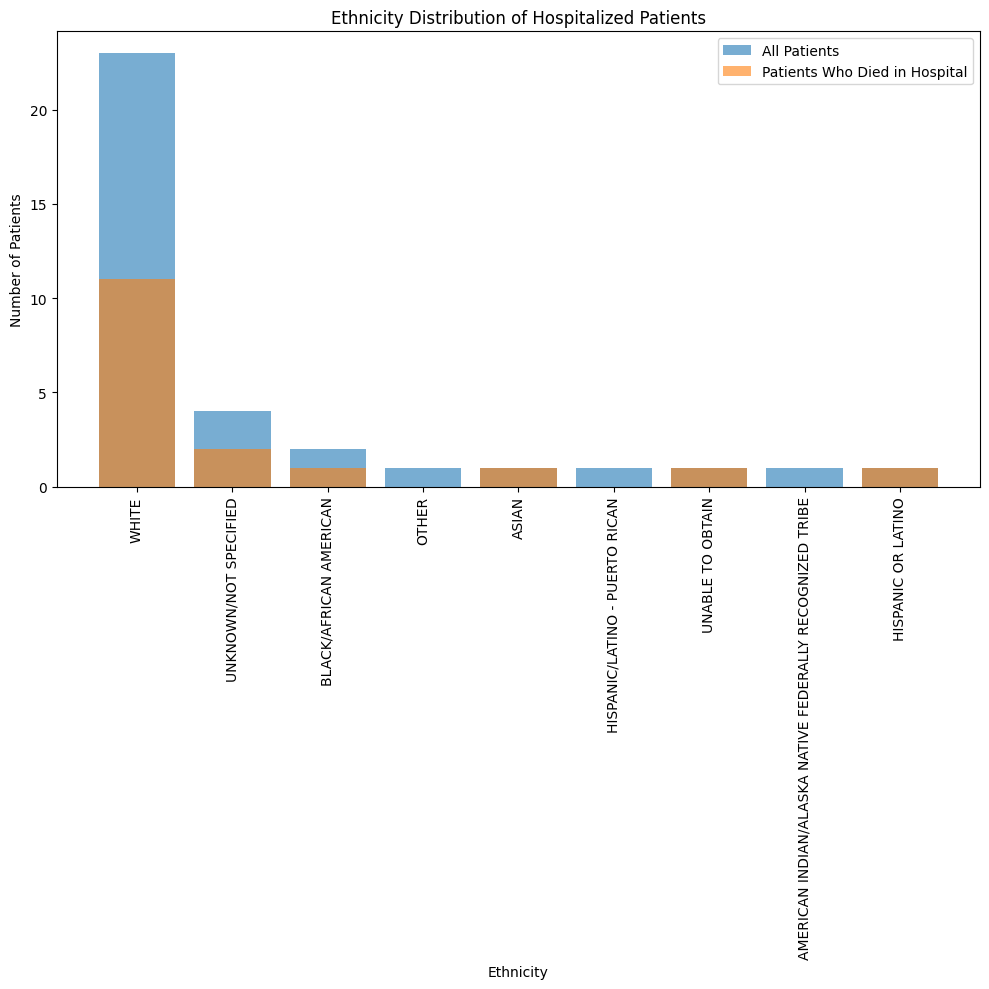

In [42]:
import pandas as pd
import matplotlib.pyplot as plt


# ספירת הערכים בכל קטגוריה בעמודת אתניות
ethnicity_counts = Demographers_data_grouped_p['ethnicity'].value_counts()

# סינון הנתונים רק למקרים שבהם המטופל מת באשפוז
expired_patients = Demographers_data_grouped_p[Demographers_data_grouped_p['hospital_expire_flag'] == 1]

# ספירת הערכים בכל קטגוריה בעמודת אתניות עבור מטופלים שמתו באשפוז
expired_ethnicity_counts = expired_patients['ethnicity'].value_counts()

# יצירת גרף עמודות
fig, ax = plt.subplots(figsize=(10, 10))

# Create bars for all patients
ax.bar(ethnicity_counts.index, ethnicity_counts.values, label='All Patients', alpha=0.6)

# Create bars for patients who died during hospitalization
ax.bar(expired_ethnicity_counts.index, expired_ethnicity_counts.values, label='Patients Who Died in Hospital', alpha=0.6)

# הוספת כותרת ותגיות צירים
ax.set_title('Ethnicity Distribution of Hospitalized Patients')
ax.set_xlabel('Ethnicity')
ax.set_ylabel('Number of Patients')
ax.legend()

# סיבוב תגיות האתניות לצורך קריאות
plt.xticks(rotation=90)

# הצגת הגרף
plt.tight_layout()
plt.show()


### Interpreting the graph, discerning whether any ethnic group exhibits a higher mortality rate than survival is challenging, as the majority of groups comprise only one patient. Notably, within the 'WHITE' group, consisting of 21 patients, 11 succumbed to mortality

In [43]:
# הצגת מספר האשפוזים והאם באשפוז האחרון מת

grouped_data = Demographers_data_grouped.groupby(['subject_id']).agg({
    'hadm_id': 'count',
    'age': 'first',
    'gender': 'first',
    'ethnicity': 'first',
    'hospital_expire_flag': 'max'
}).reset_index()

# החלפת שם העמודות
grouped_data = grouped_data.rename(columns={'hadm_id': 'count_hadm_id'})
grouped_data = grouped_data.rename(columns={'hospital_expire_flag': 'Death_at_last_hospitalization'})

grouped_data


,subject_id,count_hadm_id,age,gender,ethnicity,Death_at_last_hospitalization
0,10019,1,48,M,WHITE,1
1,10040,1,85,F,UNKNOWN/NOT SPECIFIED,0
2,10043,1,76,M,WHITE,0
3,10059,2,69,M,WHITE,1
4,10061,1,75,F,WHITE,0
5,10067,1,29,M,OTHER,0
6,10069,1,41,F,UNKNOWN/NOT SPECIFIED,1
7,10076,1,68,M,ASIAN,1
8,10088,3,77,M,WHITE,0
9,10089,1,86,M,WHITE,1


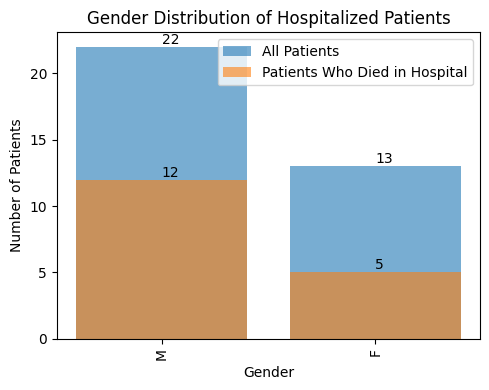

In [44]:
# התפלגות מין לפי מצב פטירה

import pandas as pd
import matplotlib.pyplot as plt

# Count the values in each category of the gender column
gender_counts = Demographers_data_grouped_p['gender'].value_counts()

# Filter the data to include only the cases where the patient died during hospitalization
expired_patients = Demographers_data_grouped_p[Demographers_data_grouped_p['hospital_expire_flag'] == 1]

# Count the values in each category of the gender column for patients who died during hospitalization
expired_gender_counts = expired_patients['gender'].value_counts()

# Create a bar plot
fig, ax = plt.subplots(figsize=(5, 4))

# Create bars for all patients
bars_all = ax.bar(gender_counts.index, gender_counts.values, label='All Patients', alpha=0.6)

# Create bars for patients who died during hospitalization
bars_expired = ax.bar(expired_gender_counts.index, expired_gender_counts.values, label='Patients Who Died in Hospital', alpha=0.6)

# Add values on top of the bars
for bar in bars_all:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # va: vertical alignment

for bar in bars_expired:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # va: vertical alignment

# Add title and axis labels
ax.set_title('Gender Distribution of Hospitalized Patients')
ax.set_xlabel('Gender')
ax.set_ylabel('Number of Patients')
ax.legend()

# Rotate gender labels for readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


### In interpreting this graph, it becomes evident that gender alone does not reliably predict higher mortality rates, as approximately half of the patients from each gender group experienced mortality. We do see that men are mechanically ventilated more than Women.

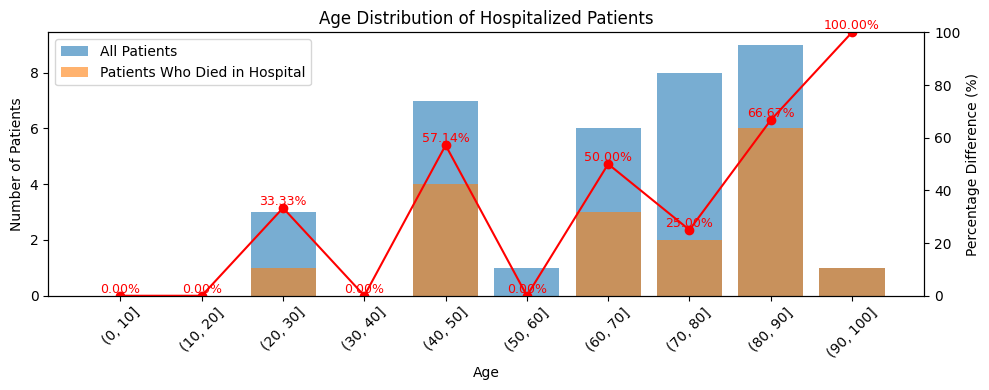

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# יצירת טווחי גיל כל 10 שנה
age_bins = range(0, 101, 10)

# ספירת הערכים בכל טווח גיל בעמודת גיל
age_counts = pd.cut(Demographers_data_grouped_p['age'], bins=age_bins).value_counts().sort_index()

# סינון הנתונים רק למקרים שבהם המטופל מת באשפוז
expired_patients = Demographers_data_grouped_p[Demographers_data_grouped_p['hospital_expire_flag'] == 1]

# ספירת הערכים בכל טווח גיל בעמודת גיל עבור מטופלים שמתו באשפוז
expired_age_counts = pd.cut(expired_patients['age'], bins=age_bins).value_counts().sort_index()

# חישוב אחוז ההבדל
percentage_difference = ((expired_age_counts / age_counts) * 100).fillna(0)

# Create a bar plot
fig, ax1 = plt.subplots(figsize=(10, 4))

# Create bars for all patients
ax1.bar(age_counts.index.astype(str), age_counts.values, label='All Patients', alpha=0.6)

# Create bars for patients who died during hospitalization
ax1.bar(expired_age_counts.index.astype(str), expired_age_counts.values, label='Patients Who Died in Hospital', alpha=0.6)

ax1.set_title('Age Distribution of Hospitalized Patients')
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of Patients')
ax1.legend()

plt.xticks(rotation=45)

ax2 = ax1.twinx()
ax2.plot(percentage_difference.index.astype(str), percentage_difference.values, color='red', marker='o', label='Percentage Difference')

ax2.set_ylabel('Percentage Difference (%)')
ax2.set_ylim(0, 100)  # Ensure the y-axis range is from 0 to 100

for x, y in zip(percentage_difference.index.astype(str), percentage_difference.values):
    ax2.text(x, y, f'{y:.2f}%', ha='center', va='bottom', fontsize=9, color='red')

plt.tight_layout()
plt.show()


### The graph shows that more patients who fell within the age ranges of 80-90 died compared to other age groups.

In [46]:
# חישוב הגיל הממוצע
average_age = grouped_data['age'].mean()
print(f"The average age: {average_age}")


The average age: 66.45714285714286


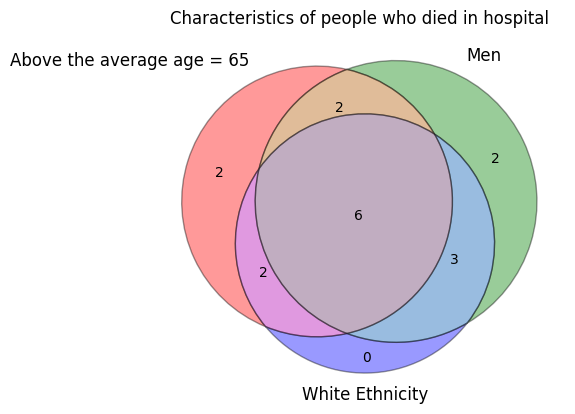

In [47]:
import pandas as pd
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# טען את הנתונים שלך
data = grouped_data

# סנן את הנתונים רק לאנשים שמתו באשפוז
data_dead = data[data['Death_at_last_hospitalization'] == 1]

# יצירת קבוצות לפי התכונות שעניינות אותנו
age_group = set(data_dead[data_dead['age'] > average_age]['subject_id'])  #  מעל הגיל הממוצע
female_group = set(data_dead[data_dead['gender'] == 'M']['subject_id'])  # גברים
ethnicity_group = set(data_dead[data_dead['ethnicity'] == 'WHITE']['subject_id'])  # לדוגמה: אתניות לבנה

# יצירת גרף ון
venn = venn3([age_group, female_group, ethnicity_group],
             ('Above the average age = 65', 'Men', 'White Ethnicity'))

# הוספת קו שחור דק לעיגולים
for subset in ('100', '010', '001', '110', '101', '011', '111'):
    if venn.get_patch_by_id(subset):  # לבדוק אם תת-קבוצה קיימת
        venn.get_patch_by_id(subset).set_edgecolor('black')
        venn.get_patch_by_id(subset).set_linewidth(1.0)  # עובי הקו

plt.title('Characteristics of people who died in hospital')
plt.show()


### From this graph you can get a very clear picture of the distribution of the data for the patients who died

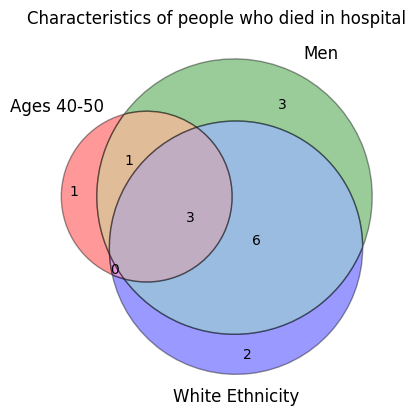

In [48]:
import pandas as pd
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

data = grouped_data

# סנן את הנתונים רק לאנשים שמתו באשפוז
data_dead = data[data['Death_at_last_hospitalization'] == 1]

# יצירת קבוצות לפי התכונות שעניינות אותנו
age_group = set(data_dead[(data_dead['age'] >= 40) & (data_dead['age'] <= 50)]['subject_id'])  # טווח גילאים 40-50
female_group = set(data_dead[data_dead['gender'] == 'M']['subject_id'])  # גברים
ethnicity_group = set(data_dead[data_dead['ethnicity'] == 'WHITE']['subject_id'])  # אתניות לבנה

# יצירת גרף ון
venn = venn3([age_group, female_group, ethnicity_group],
             ('Ages 40-50', 'Men', 'White Ethnicity'))

# הוספת קו שחור דק לעיגולים
for subset in ('100', '010', '001', '110', '101', '011', '111'):
    if venn.get_patch_by_id(subset):  # לבדוק אם תת-קבוצה קיימת
        venn.get_patch_by_id(subset).set_edgecolor('black')
        venn.get_patch_by_id(subset).set_linewidth(1.0)  # עובי הקו

plt.title('Characteristics of people who died in hospital')
plt.show()


The age range 40-50 of the expired white men does not really hold the significante data for expired white men- only 3 out of the 5 expired pts in the ages 40-50 are white men. The grapgh support our claim that the most significant group is the white men above 65.

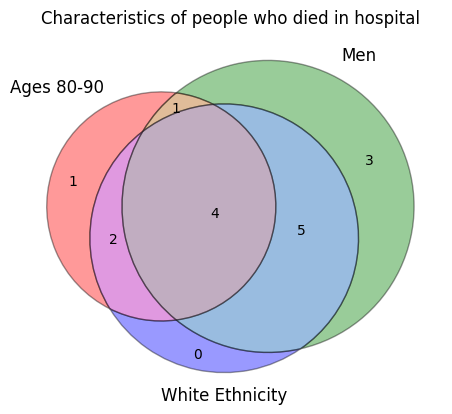

In [49]:
import pandas as pd
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# טען את הנתונים שלך
data = grouped_data

# סנן את הנתונים רק לאנשים שמתו באשפוז
data_dead = data[data['Death_at_last_hospitalization'] == 1]

# יצירת קבוצות לפי התכונות שעניינות אותנו
age_group = set(data_dead[(data_dead['age'] >= 80) & (data_dead['age'] <= 90)]['subject_id'])  # טווח גילאים 20-30
female_group = set(data_dead[data_dead['gender'] == 'M']['subject_id'])  # גברים
ethnicity_group = set(data_dead[data_dead['ethnicity'] == 'WHITE']['subject_id'])  #  אתניות לבנה

# יצירת גרף ון
venn = venn3([age_group, female_group, ethnicity_group],
             ('Ages 80-90', 'Men', 'White Ethnicity'))

# הוספת קו שחור דק לעיגולים
for subset in ('100', '010', '001', '110', '101', '011', '111'):
    if venn.get_patch_by_id(subset):  # לבדוק אם תת-קבוצה קיימת
        venn.get_patch_by_id(subset).set_edgecolor('black')
        venn.get_patch_by_id(subset).set_linewidth(1.0)  # עובי הקו

plt.title('Characteristics of people who died in hospital')
plt.show()


# Primary Diagnosis EDA

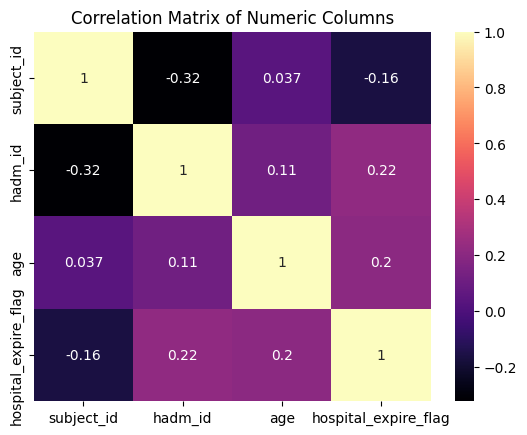

In [50]:
data=eda_df[['subject_id','hadm_id','admittime','dischtime','age','gender','ethnicity','diagnosis', 'hospital_expire_flag']]
numeric_df = data.select_dtypes(include=[float, int])

#corr matrix
corr_matrix = numeric_df.corr()

# heatmap
sns.heatmap(corr_matrix, annot=True, cmap='magma')
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

In [51]:
# Explode the lists into separate rows
diagnosis_exploded = data['diagnosis'].explode()

# Counting the frequencies and sorting them
diagnosis_counts = diagnosis_exploded.value_counts().sort_values(ascending=False)
diagnosis_counts

diagnosis
['PNEUMONIA']                                                  5
['SEPSIS']                                                     5
['CONGESTIVE HEART FAILURE']                                   3
['RESPIRATORY DISTRESS']                                       2
['ASTHMA;CHRONIC OBST PULM DISEASE']                           2
['OVERDOSE']                                                   1
['LOWER GI BLEED']                                             1
['VARICEAL BLEED']                                             1
['CHEST PAIN/ CATH']                                           1
['S/P MOTORCYCLE ACCIDENT']                                    1
['SEIZURE']                                                    1
['LUNG CANCER;SHORTNESS OF BREATH']                            1
['UROSEPSIS']                                                  1
['SEPSIS;PNEUMONIA;TELEMETRY']                                 1
['CRITICAL AORTIC STENOSIS/HYPOTENSION']                       1
['PULMONARY EDE

<ipython-input-52-c7f1ca8309bb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diagnosis_counts.values, y=diagnosis_counts.index, palette='viridis')


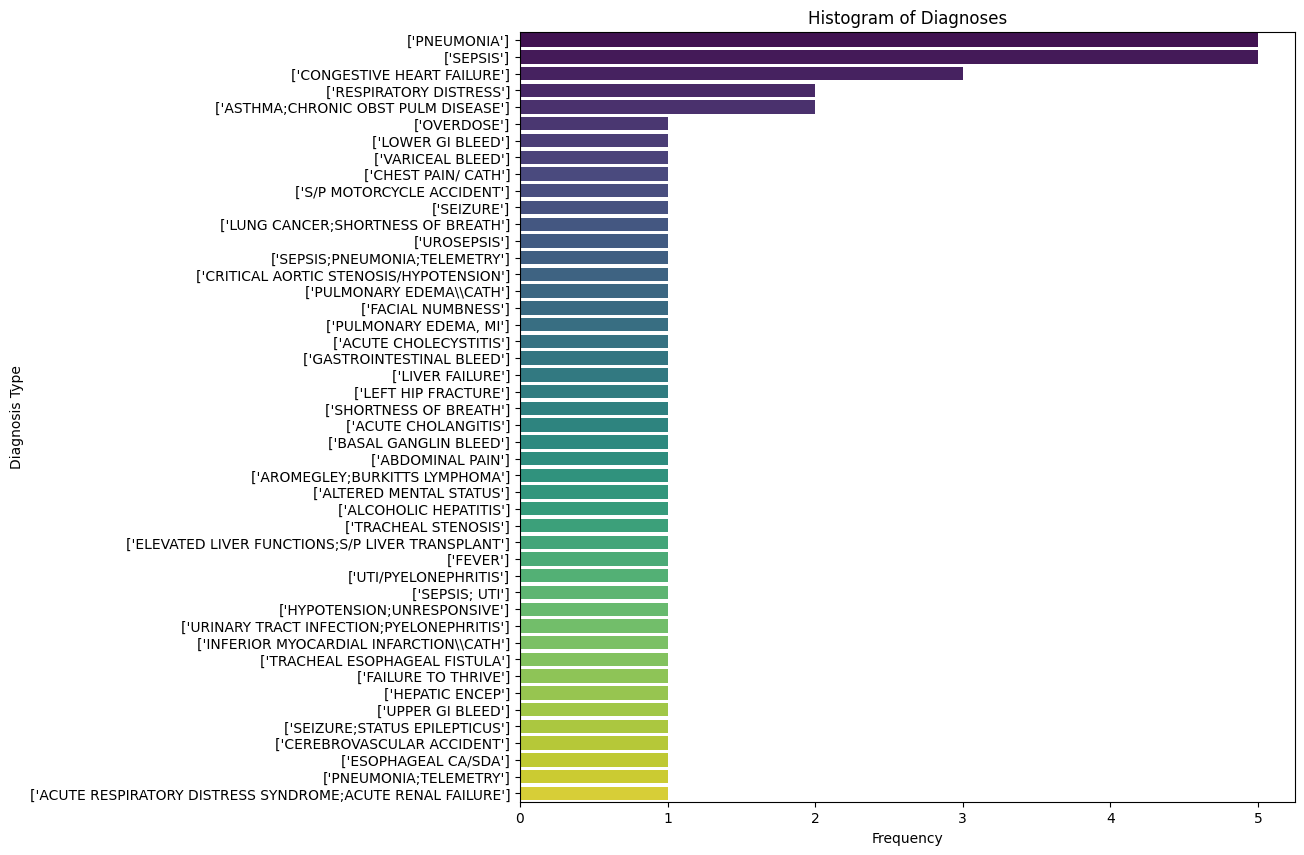

In [52]:

# Plotting the histogram with sorted and flipped axes
plt.figure(figsize=(10, 10))
sns.barplot(x=diagnosis_counts.values, y=diagnosis_counts.index, palette='viridis')
plt.title('Histogram of Diagnoses')
plt.xlabel('Frequency')
plt.ylabel('Diagnosis Type')
plt.show()


<ipython-input-53-e00ed7adcc86>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diagnosis_counts.values, y=diagnosis_counts.index, palette='viridis')


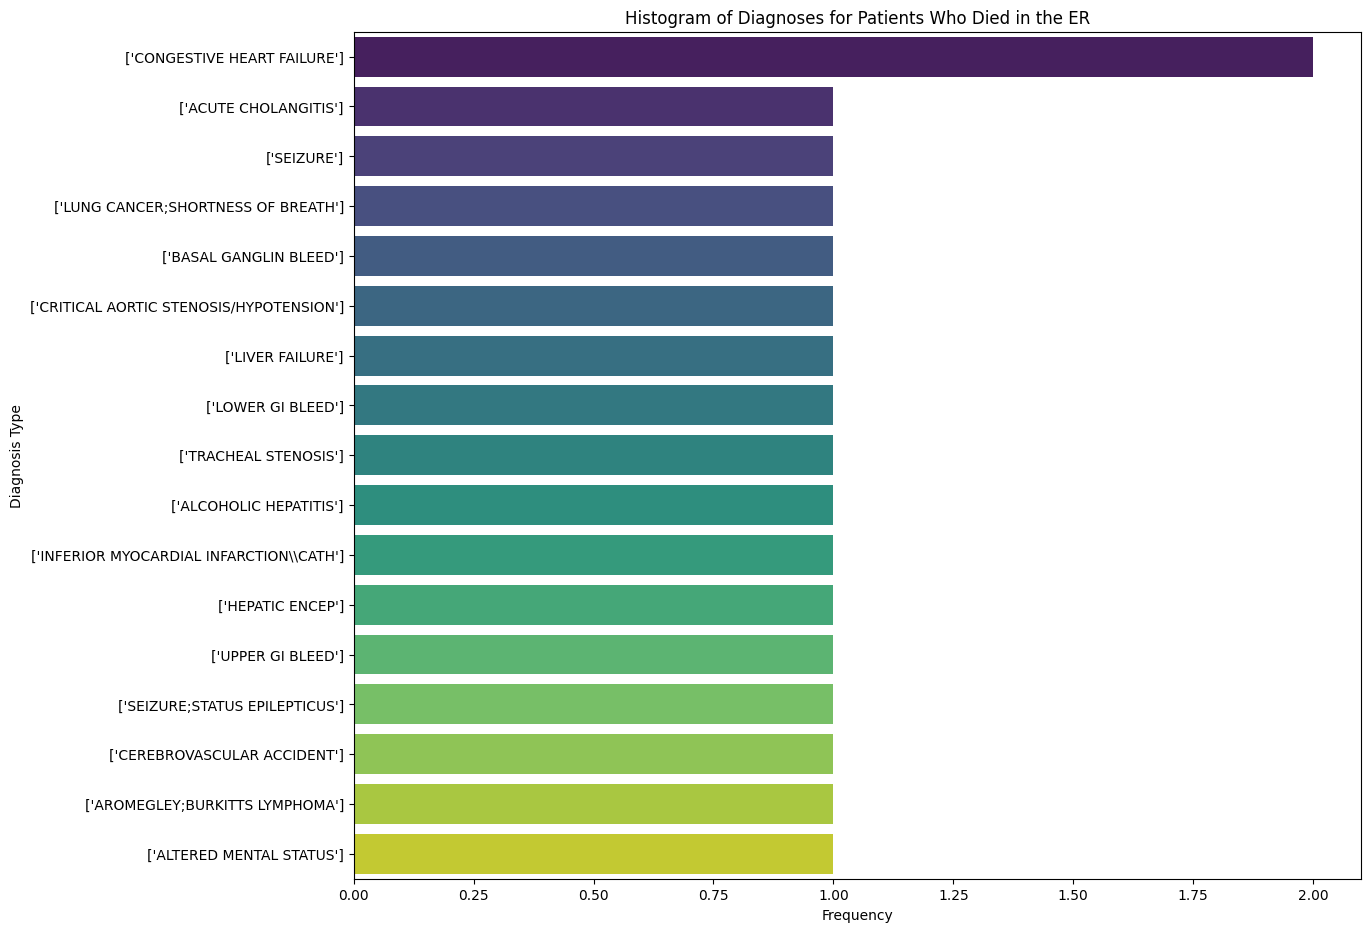

In [53]:
# Filter the dataframe for rows where hospital_expire_flag is 1
df_filtered = data[data['hospital_expire_flag'] == 1]
# Explode the lists into separate rows
diagnosis_exploded = df_filtered['diagnosis'].explode()

# Counting the frequencies and sorting them
diagnosis_counts = diagnosis_exploded.value_counts().sort_values(ascending=False)

# Plotting the histogram with sorted and flipped axes
plt.figure(figsize=(13,11))
sns.barplot(x=diagnosis_counts.values, y=diagnosis_counts.index, palette='viridis')
plt.title('Histogram of Diagnoses for Patients Who Died in the ER')
plt.xlabel('Frequency')
plt.ylabel('Diagnosis Type')
plt.show()

In [54]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   subject_id            58 non-null     int64 
 1   hadm_id               58 non-null     int64 
 2   admittime             58 non-null     object
 3   dischtime             58 non-null     object
 4   age                   58 non-null     int64 
 5   gender                58 non-null     object
 6   ethnicity             58 non-null     object
 7   icd9_code_DIAGNOSES   58 non-null     object
 8   diagnosis             58 non-null     object
 9   startdate             58 non-null     object
 10  enddate               58 non-null     object
 11  vital_signs           58 non-null     object
 12  admittime_lab         58 non-null     object
 13  dischtime_lab         58 non-null     object
 14  lab_results           58 non-null     object
 15  hospital_expire_flag  58 non-null     int6

Focusing on vital signs-
---

In [55]:

# Extract vital signs data
vital_signs_data = []
for index, row in eda_df.iterrows():
    for vital in row['vital_signs']:
        vital_signs_data.append({
            'subject_id': row['subject_id'],
            'hadm_id': row['hadm_id'],
            'admittime': row['admittime'],
            'dischtime': row['dischtime'],
            'hospital_expire_flag':row['hospital_expire_flag'],
            'itemid': vital['itemid'],
            'value': vital['value']
        })

vital_signs_df = pd.DataFrame(vital_signs_data)

# Convert columns to appropriate data types
vital_signs_df['admittime'] = pd.to_datetime(vital_signs_df['admittime'])
vital_signs_df['dischtime'] = pd.to_datetime(vital_signs_df['dischtime'])

# Summary Statistics
summary_stats = vital_signs_df.groupby('itemid')['value'].describe()

TypeError: string indices must be integers

In [ ]:
sorted_summary_stats = summary_stats.sort_values(by='count', ascending=False)

# Create a bar plot for the count of each itemid
plt.figure(figsize=(12, 8))

# Use a colormap to assign different colors
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_summary_stats)))

sorted_summary_stats['count'].plot(kind='bar', color=colors)

plt.title('Count of Each ItemID in Vital Signs Data')
plt.xlabel('ItemID')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
item_dic = pd.read_csv('/content/D_ITEMS.csv', index_col='itemid')

# Get the top 5 item IDs
top_5_item_ids = sorted_summary_stats.head().index.tolist()

# Select labels for top 5 item IDs
filtered_items = item_dic.loc[top_5_item_ids, 'label']
filtered_items

In [ ]:
# Distribution Plot for the heart rate and saturation per Expired group
plt.figure(figsize=(16, 12))

# Plot for Heart Rate (220045) - Expired
plt.subplot(2, 2, 1)
sns.histplot(vital_signs_df[(vital_signs_df['itemid'] == 220045) & (vital_signs_df['hospital_expire_flag'] == 1)]['value'], kde=True, color='blue', bins=20)
plt.title('Distribution of Heart Rate (220045) - Expired', fontsize=14)
plt.xlabel('Heart Rate', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Plot for Heart Rate (220045) - Not Expired
plt.subplot(2, 2, 2)
sns.histplot(vital_signs_df[(vital_signs_df['itemid'] == 220045) & (vital_signs_df['hospital_expire_flag'] == 0)]['value'], kde=True, color='orange', bins=20)
plt.title('Distribution of Heart Rate (220045) - Not Expired', fontsize=14)
plt.xlabel('Heart Rate', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Plot for Saturation (220277) - Expired
plt.subplot(2, 2, 3)
sns.histplot(vital_signs_df[(vital_signs_df['itemid'] == 220277) & (vital_signs_df['hospital_expire_flag'] == 1)]['value'], kde=True, color='green', bins=20)
plt.title('Distribution of Saturation (220277) - Expired', fontsize=14)
plt.xlabel('Saturation', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Plot for Saturation (220277) - Not Expired
plt.subplot(2, 2, 4)
sns.histplot(vital_signs_df[(vital_signs_df['itemid'] == 220277) & (vital_signs_df['hospital_expire_flag'] == 0)]['value'], kde=True, color='red', bins=20)
plt.title('Distribution of Saturation (220277) - Not Expired', fontsize=14)
plt.xlabel('Saturation', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


##About the HR:

most of the values of the alive group are in the normal range.

In the expired group there are more people outside the normal range (60-100)

##About the Saturation:

Alive people and expired almost show the same results, but looking closely there is a tiny up around 85 with the expired people.

Normal range of SPO2 is between 95-100, but the values are exponential- Every single drop is meaningful, therefore values that are under 90 are conciedered dangerous.

In [ ]:
# Distribution Plot for the heart rate and saturation per Expired group
plt.figure(figsize=(16, 12))

# Plot for Respiratory Rate (220210) - Expired
plt.subplot(2, 2, 1)
sns.histplot(vital_signs_df[(vital_signs_df['itemid'] == 220210) & (vital_signs_df['hospital_expire_flag'] == 1)]['value'], kde=True, color='aquamarine', bins=20)
plt.title('Distribution of Respiratory Rate (220210) - Expired', fontsize=14)
plt.xlabel('Respiratory Rate', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Plot for Respiratory Rate (220210) - Not Expired
plt.subplot(2, 2, 2)
sns.histplot(vital_signs_df[(vital_signs_df['itemid'] == 220210) & (vital_signs_df['hospital_expire_flag'] == 0)]['value'], kde=True, color='beige', bins=20)
plt.title('Distribution of Respiratory Rate (220210) - Not Expired', fontsize=14)
plt.xlabel('Respiratory Rate', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Plot for Non Invasive Blood Pressure mean (220181) - Expired
plt.subplot(2, 2, 3)
sns.histplot(vital_signs_df[(vital_signs_df['itemid'] == 220181) & (vital_signs_df['hospital_expire_flag'] == 1)]['value'], kde=True, color='olive', bins=20)
plt.title('Distribution of Non Invasive Blood Pressure mean (220181) - Expired', fontsize=14)
plt.xlabel('Non Invasive Blood Pressure mean', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Plot for Non Invasive Blood Pressure mean (220181) - Not Expired
plt.subplot(2, 2, 4)
sns.histplot(vital_signs_df[(vital_signs_df['itemid'] == 220181) & (vital_signs_df['hospital_expire_flag'] == 0)]['value'], kde=True, color='darkmagenta', bins=20)
plt.title('Distribution of Non Invasive Blood Pressure mean (220181) - Not Expired', fontsize=14)
plt.xlabel('Non Invasive Blood Pressure mean', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


##About the RR

Since all pts are mechanically ventilated- it is interesting to see most of the results in both groups are around 20 BPM.  Normal RR for a breathing adult is 12-20. Also a small jump around the 0 value of expired pts, probably representing a dead pt or a disconnection of machine.

##About the BP
Noraml range is 70 - 110 mmHg.
It is clear that expired pts suffered from abnormal BP during their addmition, compared to alive pts.

# **checking Correlation for different vital signs**

In [ ]:
vital_signs_df['value']=pd.to_numeric(vital_signs_df['value'])

In [ ]:
# Correlation Analysis
correlation_matrix = vital_signs_df.pivot_table(index='subject_id', columns='itemid', values='value').corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Vital Signs')
plt.show()

In [ ]:
# Iterate through the correlation matrix
strong_corr_pairs = []
for itemid1 in correlation_matrix.columns:
    for itemid2 in correlation_matrix.columns:
        if itemid1 < itemid2 and correlation_matrix.loc[itemid1, itemid2] > 0.63:
            strong_corr_pairs.append((itemid1, itemid2))


In [ ]:
# Read the item dictionary DataFrame
item_dic = pd.read_csv('/content/D_ITEMS.csv')

# Dictionary mapping item IDs to their labels
item_labels = dict(zip(item_dic['itemid'], item_dic['label']))

# Sort strong_corr_pairs by the absolute value of the correlation
sorted_pairs = sorted(strong_corr_pairs, key=lambda x: abs(correlation_matrix.loc[x[0], x[1]]), reverse=True)

# Iterate through sorted_pairs and print item labels along with correlation value
for pair in sorted_pairs:
    item1, item2 = pair
    label1 = item_labels[item1]
    label2 = item_labels[item2]
    corr_value = correlation_matrix.loc[item1, item2]
    print(f"({item1}, {item2}): {label1}, {label2}, Correlation: {corr_value:.2f}")


interesting pairs=

(455, 646): NBP [Systolic], SpO2, Correlation: 0.79,

(455, 678): NBP [Systolic], Temperature F, Correlation: 0.76,

(646, 678): SpO2, Temperature F, Correlation: 0.74,

(220045, 224690): Heart Rate, Respiratory Rate (Total), Correlation: 0.64


#Focusing on the Lab resaults

In [ ]:

# Extract lab results data
lab_result_data = []
for index, row in eda_df.iterrows():
    for lab in row['lab_results']:
        lab_result_data.append({
            'subject_id': row['subject_id'],
            'hadm_id': row['hadm_id'],
            'admittime': row['admittime'],
            'dischtime': row['dischtime'],
            'hospital_expire_flag':row['hospital_expire_flag'],
            'itemid': lab['itemid'],
            'value': lab['value'],
            'flag': lab['flag']
        })

lab_result_df = pd.DataFrame(lab_result_data)

# Convert columns to appropriate data types
lab_result_df['admittime'] = pd.to_datetime(lab_result_df['admittime'])
lab_result_df['dischtime'] = pd.to_datetime(lab_result_df['dischtime'])

# Summary Statistics
summary_stats = lab_result_df.groupby('itemid')['value'].describe()

In [ ]:
#summary_stats=summary_stats.reset_index()
top_lab=summary_stats.sort_values(by='count',ascending=False).head(11).reset_index()
top_labels = df_D_LABITEMS[df_D_LABITEMS['itemid'].isin(top_lab.itemid)]
top_lab

In [ ]:
lab_result_df_expired=lab_result_df[lab_result_df['hospital_expire_flag']==1]
lab_result_df_alive=lab_result_df[lab_result_df['hospital_expire_flag']==0]

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:


# Create a dictionary with the codes, labels, fluids, categories, and counts
data = {
    'Code': [51221, 50971, 50820, 50818, 50804, 50802, 50821, 50983, 50902, 50882, 51006, 50912, 50868, 50800, 50931, 50960, 51265, 51222, 51301, 51248, 51279, 51277, 51249, 51250, 50893, 50970, 51275, 51274, 51237, 50825, 50812, 50816, 50819, 50827, 50813, 50826, 50808, 50885, 50861, 50878, 50863, 50817, 50954, 51244, 51200, 51146, 51254, 51256, 50822, 50862, 50809, 50828],
    'Label': ['Hematocrit', 'Potassium', 'pH', 'Oxygen Saturation', 'Calculated Total CO2', 'Base Excess', 'pO2', 'Sodium', 'Chloride', 'Bicarbonate', 'Urea Nitrogen', 'Creatine Kinase, MB Isoenzyme', 'Anion Gap', 'SPECIMEN TYPE', 'Globulin', 'Magnesium', 'Platelet Count', 'Hemoglobin', 'Total Collection Time', 'MCH', 'Red Blood Cells', 'RDW', 'MCHC', 'MCV', 'Calcium, Total', 'Phosphate', 'PTT', 'PT', 'INR(PT)', 'Temperature', 'Intubated', 'O2 Flow', 'PEEP', 'Tidal Volume', 'Lactate', 'Tidal Volume', 'Free Calcium', 'Bilirubin, Total', 'Alanine Aminotransferase (ALT)', 'Asparate Aminotransferase (AST)', 'Albumin', 'Oxygen', 'Lactate Dehydrogenase (LD)',
'Lymphocytes', 'Eosinophils', 'Basophils', 'Monocytes', 'Neutrophils', 'Potassium, Whole Blood', 'Alkaline Phosphatase', 'Glucose', 'Ventilator'],
    'Fluid': ['Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Urine', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood', 'Blood'],
    'Category': ['Hematology', 'Chemistry', 'Blood Gas', 'Blood Gas', 'Blood Gas', 'Blood Gas', 'Blood Gas', 'Chemistry', 'Chemistry', 'Chemistry', 'Chemistry', 'Chemistry', 'Chemistry', 'Blood Gas', 'Chemistry', 'Chemistry', 'Hematology', 'Hematology', 'Chemistry', 'Hematology', 'Hematology', 'Hematology', 'Hematology', 'Hematology', 'Chemistry', 'Chemistry', 'Hematology', 'Hematology', 'Hematology', 'Blood Gas', 'Blood Gas', 'Blood Gas', 'Blood Gas', 'Blood Gas', 'Blood Gas', 'Blood Gas', 'Blood Gas', 'Chemistry', 'Chemistry', 'Chemistry', 'Chemistry', 'Blood Gas', 'Chemistry', 'Hematology', 'Hematology', 'Hematology', 'Hematology', 'Hematology', 'Blood Gas', 'Chemistry', 'Blood Gas', 'Blood Gas'],
    'Count_Dead': [681, 326, 681, 681, 681, 681, 681, 326, 326, 326, 326, 326, 326, 681, 326, 326, 326, 326, 11, 326, 326, 326, 326, 326, 326, 326, 326, 326, 326, 326, 326, 326, 326, 326, 681, 326, 326, 326, 326, 326, 326, 326, 326, 326, 326, 326, 326, 326, 326, 326, 326, 326],
    'Count_Not_Dead': [602, 611, 268, 268, 268, 268, 268, 611, 611, 611, 611, 611, 611, 173, 611, 611, 611, 611, 33, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 183, 183, 183, 183, 183, 268, 183, 183, 611, 611, 611, 611, 183, 611, 611, 611, 611, 611, 611, 183, 611, 183, 183]
}


# Create the DataFrame
df = pd.DataFrame(data)

# Sort the DataFrame based on the count values for the 'Dead' group
df = df.sort_values(by=['Count_Dead'], ascending=False)
df.head(11)


In [ ]:
# Create a bar plot with Plotly
fig = go.Figure()

# Add bars for 'Count_Dead'
fig.add_trace(go.Bar(
    x=df['Label'],
    y=df['Count_Dead'],
    name='Expired',
    marker_color='red'
))

# Add bars for 'Count_Not_Dead'
fig.add_trace(go.Bar(
    x=df['Label'],
    y=df['Count_Not_Dead'],
    name='Not Expired',
    marker_color='blue',
    opacity=0.6
))

# Update layout
fig.update_layout(
    barmode='group',
    xaxis_tickangle=-45,
    title='Comparison of Counts for Expired and Not Expired Groups',
    xaxis_title='Lab Test',
    yaxis_title='Count',
    legend_title='Group',
    template='plotly_white'
)

# Show the plot
fig.show()

In [ ]:


# Normal ranges
normal_ranges = {
    50820: (7.35, 7.45),  # pH
    50813: (2.0, 4.0)  # Lactate
}


# Create subplots

# Plot for pH
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
ph_expire=lab_result_df_expired[lab_result_df_expired['itemid']==50820]
x=ph_expire['value']
ph_alive=lab_result_df_alive[lab_result_df_alive['itemid']==50820]
x2=ph_alive['value']

sns.histplot(data=ph_expire, x=x, bins=20, kde=True, color='blue', ax=axes[0], label='Expired',alpha=0.6)
sns.histplot(data=ph_alive, x=x2, bins=20, kde=True, color='red', ax=axes[0], label='Alive',alpha=0.3)
axes[0].axvline(x=normal_ranges[50820][0], color='green', linestyle='--', label='Normal Range (Lower)')
axes[0].axvline(x=normal_ranges[50820][1], color='green', linestyle='--', label='Normal Range (Upper)')
axes[0].set_title('Distribution of pH')
axes[0].legend()

# Plot for Lactate
ph_expire=lab_result_df_expired[lab_result_df_expired['itemid']==50813]
x=ph_expire['value']
ph_alive=lab_result_df_alive[lab_result_df_alive['itemid']==50813]
x2=ph_alive['value']
sns.histplot(data=lab_result_df_expired, x=x, bins=20, kde=True, color='blue', ax=axes[1], label='Expired',alpha=0.6)
sns.histplot(data=lab_result_df_alive, x=x2, bins=20, kde=True, color='red', ax=axes[1], label='Alive',alpha=0.3)
axes[1].axvline(x=normal_ranges[50813][0], color='green', linestyle='--', label='Normal Range (Lower)')
axes[1].axvline(x=normal_ranges[50813][1], color='green', linestyle='--', label='Normal Range (Upper)')
axes[1].set_title('Distribution of Lactate')
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


We dont see any difference between the groups. We can assume that the two specific lab results cannot provide us with information on any prognosis evaluation.

In [ ]:
summary_stats_expired = lab_result_df_expired.groupby('itemid')['value'].describe()
summary_stats_expired.sort_index(inplace=True)
summary_stats_alive=lab_result_df_alive.groupby('itemid')['value'].describe()
summary_stats_alive.sort_index(inplace=True)
summary_stats_expired['mean_diff']=summary_stats_expired['mean']-summary_stats_alive['mean']
summary_stats_expired[summary_stats_expired['mean_diff']>0.000000000001]

Almost no difference between the two groups!

In [ ]:
#continue the same plots for different lab results and compare mean values of lab results between the two groups to see wht lab result show a difference